In [1]:
import pandas as pd 
import numpy as np

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.datasets import mnist
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset and adding the padding

In [2]:
def add_padding(dataset=None, pad_width = 0, constant_values=0) -> []:
    padded_dataset = []
    
    for i in dataset:
        padded = np.pad(i, pad_width=pad_width, mode='constant', constant_values=constant_values)
        padded_dataset.append(padded[:, :, np.newaxis])
    
    return padded_dataset
    
def write_matrix_to_file(matrix=None, file_name="random.txt"):
    with open(file_name, 'wb') as f:
        for line in matrix:
            np.savetxt(f, line, delimiter=' ')

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

new_x_train = add_padding(x_train, pad_width=2, constant_values=0)
new_x_test = add_padding(x_test, pad_width=2, constant_values=0)

In [4]:
new_x_train = np.asarray(new_x_train)
new_x_test = np.asarray(new_x_test)

dim_data = np.prod(new_x_train.shape[1:])

new_x_train = new_x_train.reshape(new_x_train.shape[0], dim_data)
new_x_train = new_x_train.astype('float32')

new_x_test = new_x_test.reshape(new_x_test.shape[0], dim_data)
new_x_test = new_x_test.astype('float32')

In [5]:
new_x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [6]:
model = Sequential()

model.add(Dense(1024, input_shape=(dim_data,)))

# gerar novas camadas
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(512, activation='relu'))

model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse'])

earlyStopping = EarlyStopping(monitor='val_loss', 
                              patience=25)

history = model.fit(new_x_train,
                    y_train,
                    epochs=250, 
                    batch_size=1000, 
                    verbose=0, 
                    validation_split=0.2, 
                    callbacks=[earlyStopping])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               51712     
Total params: 1,224,012
Trainable params: 1,224,012
Non-trainable params: 0
_________________________________________________________________


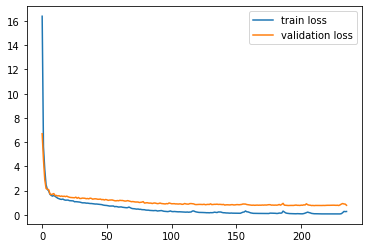

In [8]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [9]:
test_results = model.evaluate(new_x_train, y_train, verbose=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.3174 - mse: 0.3174


In [10]:
train_features = model.predict(new_x_train)

In [11]:
test_features = model.predict(new_x_test)

In [12]:
train_features.shape

(60000, 512)

In [13]:
test_features.shape

(10000, 512)

In [14]:
train_features = np.matrix(train_features)
write_matrix_to_file(train_features, file_name="simple_ann_train_features.out")

In [15]:
test_features = np.matrix(test_features)
write_matrix_to_file(test_features, file_name="simple_ann_test_features.out")